# `📊 AIFFEL DATATHON 👨🏻‍💻`
## **참 10조?** Netflix Dataset

![](https://mblogthumb-phinf.pstatic.net/20160526_126/emo-art_1464269073322MHPQj_JPEG/zLNFIBtisESk634049407784855842.jpg?type=w800)

### 👋 **안녕하세요! 저희는 Netflix Dataset을 분석한 강남캠 10조입니다.**

</br>

📌 저희 조는 **넷플릭스 컨텐츠의 생산국가 데이터(`contry`)의 결측치를 보완하기 위해 웹크롤링**을 이용하였습니다.

📌 추가로, 의미 있는 분석을 도출하기 위해서 **IMDB의 별점 데이터를 크롤링하여 사용**하였습니다.

📌 이후 시각화에서는 전체 넷플릭스 컨텐츠의 큰 흐름 속 **한국 컨텐츠의 특징을 중점적으로 알아보고자** 하였습니다.

</br>

안보이는 그래프들은 [코랩](https://colab.research.google.com/drive/1KoLPXBe6brfUA2tbzO1cj3RgK9uLU_I5?usp=sharing)에서 보실 수 있어요! 

### 라이브러리 불러오기

In [3]:
from bs4 import BeautifulSoup 
import copy
import requests
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os
import time
import warnings 
warnings.filterwarnings('ignore')

### 데이터 로드

In [4]:
csv_path = "/content/netflix_titles.csv"
#csv_path = os.getenv("HOME") +"/aiffel/datathon/netflix_titles.csv"
original_data = pd.read_csv(csv_path)
df = original_data.copy()

### 데이터 살펴보기

In [5]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [6]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### 데이터 결측치 확인

In [8]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

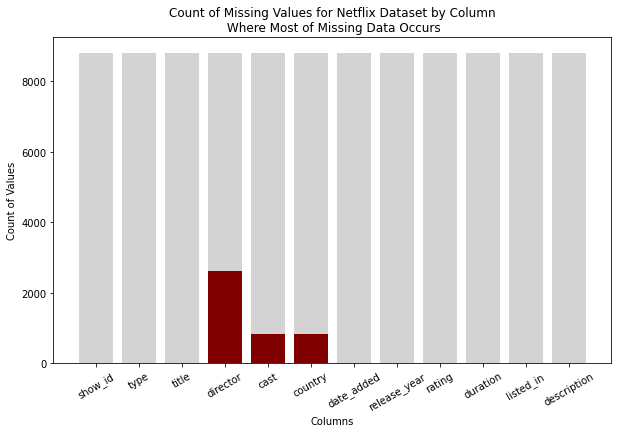

In [9]:
null_values = df.isnull().sum() 
not_null = df.notnull().sum() 
plt.figure(figsize=(10,6)) 
ax = plt.subplot() 
plt.bar(range(len(df.columns)),null_values,color='maroon') 
plt.bar(range(len(df.columns)),not_null,color='lightgray',bottom=null_values) 
ax.set_xticks(range(len(df.columns))) 
ax.set_xticklabels(df.columns,rotation=30) 
plt.xlabel('Columns') 
plt.ylabel('Count of Values') 
plt.title('Count of Missing Values for Netflix Dataset by Column\n Where Most of Missing Data Occurs') 
plt.show()

### country열 결측치 처리: 웹크롤링

### dataFrame의 country열에서 결측치들만 추출

In [ ]:
miss_num = list(df['country'][df['country'].isnull()].index)
miss_titles = []

for i in miss_num:
    miss_titles.append(df['title'][i])

for i,j in enumerate(miss_titles):
    print(i,j)

In [11]:
print(miss_num)

[2, 3, 5, 6, 10, 11, 13, 14, 16, 18, 19, 20, 22, 23, 26, 30, 31, 33, 34, 35, 36, 45, 47, 64, 68, 70, 71, 74, 75, 77, 78, 79, 80, 83, 85, 86, 87, 88, 89, 93, 100, 102, 103, 110, 112, 113, 119, 121, 123, 128, 130, 132, 147, 148, 165, 180, 181, 185, 186, 187, 189, 194, 196, 197, 213, 214, 218, 221, 222, 223, 224, 225, 226, 230, 234, 235, 236, 237, 238, 239, 240, 242, 243, 244, 245, 246, 248, 249, 250, 252, 255, 256, 257, 258, 260, 261, 262, 268, 287, 294, 309, 318, 320, 331, 336, 339, 362, 363, 364, 367, 368, 369, 371, 372, 373, 375, 376, 379, 381, 384, 387, 388, 394, 395, 396, 397, 398, 399, 400, 404, 405, 406, 407, 408, 409, 411, 412, 413, 414, 416, 417, 418, 419, 420, 421, 422, 423, 424, 427, 428, 430, 431, 432, 435, 438, 441, 443, 444, 454, 455, 458, 461, 464, 465, 466, 467, 468, 470, 471, 475, 476, 479, 480, 481, 482, 483, 484, 485, 487, 490, 495, 497, 498, 500, 501, 504, 505, 507, 546, 549, 550, 552, 560, 570, 571, 577, 580, 586, 587, 590, 616, 619, 621, 623, 624, 626, 629, 632, 633

### country 결측치 컬럼의 결측치들의 영화 제목으로 크롤링해서 저장

In [12]:
country = []

for i in miss_titles:
    try:
        base_url = 'https://www.imdb.com/find?q='
        url = base_url + i
        print(url)
        response = requests.get(url)
        soup = BeautifulSoup(response.text,'html.parser')
        #print(soup)
        movie_url = soup.select_one('tr.findResult.odd > td.result_text > a')['href']
        print(movie_url)
        new_movie_url = 'https://www.imdb.com'+ movie_url
        print(new_movie_url)
        response = requests.get(new_movie_url)
        soup = BeautifulSoup(response.text,'html.parser')
        temp = soup.select('section.ipc-page-section.ipc-page-section--base.celwidget > div.styles__MetaDataContainer-sc-12uhu9s-0.cgqHBf > ul.ipc-metadata-list.ipc-metadata-list--dividers-all.ipc-metadata-list--base > li.ipc-metadata-list__item > div.ipc-metadata-list-item__content-container > ul.ipc-inline-list.ipc-inline-list--show-dividers.ipc-inline-list--inline.ipc-metadata-list-item__list-content.base > li.ipc-inline-list__item > a.ipc-metadata-list-item__list-content-item.ipc-metadata-list-item__list-content-item--link')[1].text
        print(temp)
        country.append(temp)
        
    except:
        country.append('NaN')
        pass

https://www.imdb.com/find?q=Ganglands
/title/tt13278100/
https://www.imdb.com/title/tt13278100/
France
https://www.imdb.com/find?q=Jailbirds New Orleans
/title/tt15320436/
https://www.imdb.com/title/tt15320436/
United States
https://www.imdb.com/find?q=Midnight Mass
/title/tt10574558/
https://www.imdb.com/title/tt10574558/
United States
https://www.imdb.com/find?q=My Little Pony: A New Generation
/title/tt10101702/
https://www.imdb.com/title/tt10101702/
United States
https://www.imdb.com/find?q=Vendetta: Truth, Lies and The Mafia
/title/tt14216574/
https://www.imdb.com/title/tt14216574/
United Kingdom
https://www.imdb.com/find?q=Bangkok Breaking
/title/tt14202282/
https://www.imdb.com/title/tt14202282/
Thailand
https://www.imdb.com/find?q=Confessions of an Invisible Girl
/title/tt15204288/
https://www.imdb.com/title/tt15204288/
Brazil
https://www.imdb.com/find?q=Crime Stories: India Detectives
/title/tt14178956/
https://www.imdb.com/title/tt14178956/
India
https://www.imdb.com/find?q=E

In [13]:
country
wrong_number = [38,42,54,55,112,131,135,138,139,140,144,146,167,220,244,246,247,250,259,286,358,362,373,387,389,390,392,394,401,404,407,412,416,423,434,439,440,441,450,454,464,504,506,507,509,516,526,528,530,534,536,543,558,559,562,567,568,569,576,578,580,585,594,598,606,608,610,622,627,628,629,630,649,650,664,675,682,706,713,716,738,748,760,761,777,785,808,809,812,813,819,830]
correct_country = ['India','Nigeria','Spain','United States','Palestine','India','India','India','India','India','India','India','India','United States','South Korea','United States','United States','United States','India','United States','United States','Australia','United States','Spain','United States','Malaysia','United States','United States','Singapore','United States','United States','Australia','United States','Saudi Arabia','United States','India','United States','United Kingdom','United Kingdom','United States','Turkey','Columbia','United States','United States','Australia','Canada','United States','Malaysia','Ireland','Taiwan','United States','United States','Spain','United States','United States','United States','United Kingdom','United States','United States','United States','United Kingdom','Singapore','United States','Italy','United States','United States','United Kingdom','United States','United States','South Korea','China','United States','United States','Iceland','United States','United States','United States','United States','United States','United States','United States','Thailand','United States','United States','India','Ukraine','United States','Canada','United States','United Kingdom','United States,','South Korea']

for index,countries in enumerate(country):
    for wrong,correct in zip(wrong_number,correct_country):
        if index == wrong:
            country[index] = correct
    

country

['France',
 'United States',
 'United States',
 'United States',
 'United Kingdom',
 'Thailand',
 'Brazil',
 'India',
 'Spain',
 'United States',
 'Spain',
 'United States',
 'India',
 'United States',
 'India',
 'India',
 'United States',
 'South Korea',
 'NaN',
 'Romania',
 'France',
 'United States',
 'Nigeria',
 'United States',
 'Germany',
 'Mexico',
 'United States',
 'United States',
 'United States',
 'NaN',
 'India',
 'NaN',
 'Germany',
 'United States',
 'United States',
 'United States',
 'Germany',
 'United States',
 'India',
 'Sweden',
 'South Korea',
 'United States',
 'Nigeria',
 'Spain',
 'United Kingdom',
 'United States',
 'Philippines',
 'South Korea',
 'Hindi',
 'United Kingdom',
 'United States',
 'Taiwan',
 'United States',
 'United States',
 'Spain',
 'United States',
 'United States',
 'United States',
 'South Korea',
 'Japan',
 'South Korea',
 'Canada',
 'United States',
 'United States',
 'United Kingdom',
 'United Kingdom',
 'United States',
 'United States',

### 크롤링한 결측치 country값을 DataFrame의 비어있는 행에 저장

In [14]:
for i,j in zip(miss_num,country): 
    df.iloc[i,5] = j
    print(df.iloc[i,5])
    

France
United States
United States
United States
United Kingdom
Thailand
Brazil
India
Spain
United States
Spain
United States
India
United States
India
India
United States
South Korea
NaN
Romania
France
United States
Nigeria
United States
Germany
Mexico
United States
United States
United States
NaN
India
NaN
Germany
United States
United States
United States
Germany
United States
India
Sweden
South Korea
United States
Nigeria
Spain
United Kingdom
United States
Philippines
South Korea
Hindi
United Kingdom
United States
Taiwan
United States
United States
Spain
United States
United States
United States
South Korea
Japan
South Korea
Canada
United States
United States
United Kingdom
United Kingdom
United States
United States
Australia
Brazil
United States
Spain
Norway
United States
France
United States
India
NaN
NaN
NaN
South Korea
India
Germany
Egypt
United States
Taiwan
United States
United States
Philippines
Germany
United Kingdom
Nigeria
India
Italy
France
Brazil
United States
Nigeria
Th

### 결과 확인

In [15]:
for i,j in enumerate(miss_num):
    print(i,df.iloc[j,5])

0 France
1 United States
2 United States
3 United States
4 United Kingdom
5 Thailand
6 Brazil
7 India
8 Spain
9 United States
10 Spain
11 United States
12 India
13 United States
14 India
15 India
16 United States
17 South Korea
18 NaN
19 Romania
20 France
21 United States
22 Nigeria
23 United States
24 Germany
25 Mexico
26 United States
27 United States
28 United States
29 NaN
30 India
31 NaN
32 Germany
33 United States
34 United States
35 United States
36 Germany
37 United States
38 India
39 Sweden
40 South Korea
41 United States
42 Nigeria
43 Spain
44 United Kingdom
45 United States
46 Philippines
47 South Korea
48 Hindi
49 United Kingdom
50 United States
51 Taiwan
52 United States
53 United States
54 Spain
55 United States
56 United States
57 United States
58 South Korea
59 Japan
60 South Korea
61 Canada
62 United States
63 United States
64 United Kingdom
65 United Kingdom
66 United States
67 United States
68 Australia
69 Brazil
70 United States
71 Spain
72 Norway
73 United States
7

In [16]:
len(df)

8807

### country 'NAN'행 전부 삭제

In [17]:
#nan = list(df[df['country'] == 'NaN'].index)
#print(nan)
#df.drop(i).reset_index(drop=True,inplace=True)
nan = df[df['country'].str.contains('NaN')].index
df_1 = df.drop(nan).reset_index(drop=True)

In [18]:
print(len(df_1))
print(df_1.head(16))
df_1.tail()

8591
   show_id     type                                title  \
0       s1    Movie                 Dick Johnson Is Dead   
1       s2  TV Show                        Blood & Water   
2       s3  TV Show                            Ganglands   
3       s4  TV Show                Jailbirds New Orleans   
4       s5  TV Show                         Kota Factory   
5       s6  TV Show                        Midnight Mass   
6       s7    Movie     My Little Pony: A New Generation   
7       s8    Movie                              Sankofa   
8       s9  TV Show        The Great British Baking Show   
9      s10    Movie                         The Starling   
10     s11  TV Show  Vendetta: Truth, Lies and The Mafia   
11     s12  TV Show                     Bangkok Breaking   
12     s13    Movie                         Je Suis Karl   
13     s14    Movie     Confessions of an Invisible Girl   
14     s15  TV Show      Crime Stories: India Detectives   
15     s16  TV Show                

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8586,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8587,s8804,TV Show,Zombie Dumb,NaN,NaN,South Korea,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8588,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8589,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8590,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [19]:
df_1

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",France,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8586,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8587,s8804,TV Show,Zombie Dumb,NaN,NaN,South Korea,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8588,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8589,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [20]:
df_1.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8586,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8587,s8804,TV Show,Zombie Dumb,NaN,NaN,South Korea,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8588,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8589,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8590,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


### dataFrame의 rating 결측치

In [21]:
df_1['rating'][df_1['rating'].isnull()] # 결측치 행 확인

5822    NaN
6640    NaN
7115    NaN
7332    NaN
Name: rating, dtype: object

In [22]:
df_1.loc[df_1["rating"]=='66 min', "rating"] = 18 

In [23]:
df_1.loc[df_1["rating"]=='74 min', "rating"] = 18
df_1.loc[df_1["rating"]=='84 min', "rating"] = 18

df_1['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 18, 'NR', nan, 'TV-Y7-FV', 'UR'],
      dtype=object)

In [24]:
#rating_idx = df_1[df_1["rating"].isna()].index.tolist()
#print(rating_idx)
#loss_rating = [7,16,18,18]

#for i,loss in zip(rating_idx,loss_rating):
#    df_1.iloc[i,8] = loss

    


In [25]:
df_1.iloc[5823, 8] = 7
df_1.iloc[6641, 8] = 16
df_1.iloc[7116, 8] = 18
df_1.iloc[7333, 8] = 18

In [26]:
df_1['rating'].isna().sum()

4

In [27]:
df_1.iloc[5989]

show_id                                                     s6157
type                                                      TV Show
title                                         An Innocent Mistake
director                                                      NaN
cast            Jason Wang, Mathilde Lin, Mo Tzu Yi, Xi Man-Ni...
country                                                    Taiwan
date_added                                        January 1, 2017
release_year                                                 2012
rating                                                      TV-14
duration                                                 1 Season
listed_in       International TV Shows, Romantic TV Shows, TV ...
description     Raised by three mothers, a self-assured teen i...
Name: 5989, dtype: object

In [28]:
rating_data = {'TV-PG': 7,'TV-MA': 18,'TV-Y7-FV': 7,'TV-Y7': 7, 'TV-14': 16,'R': 18,'TV-Y': 0,'NR': 18,'PG-13': 13, 'TV-G': 0,'PG': 7,'G': 0,'UR': 18,'NC-17': 18}

df_1 = df_1.replace({'rating': rating_data})

df_1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,13.0,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,18.0,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",France,"September 24, 2021",2021,18.0,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,United States,"September 24, 2021",2021,18.0,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,18.0,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### 필요 없는 Show id 삭제

In [29]:
df_1.drop(columns=['show_id'], inplace=True) 
df_1

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,13.0,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,18.0,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",France,"September 24, 2021",2021,18.0,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,NaN,United States,"September 24, 2021",2021,18.0,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,18.0,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...
8586,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,18.0,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8587,TV Show,Zombie Dumb,NaN,NaN,South Korea,"July 1, 2019",2018,7.0,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8588,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,18.0,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8589,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,7.0,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


### date_added  결측치 컬럼 삭제

In [30]:
df_1 = df_1[df_1["date_added"].notna()]

In [31]:
df_1['date_added'][df_1['date_added'].isnull()]

Series([], Name: date_added, dtype: object)

In [32]:
df_1["date_added"] = pd.to_datetime(df_1['date_added'])
df_1['year_added'] = df_1['date_added'].dt.year
df_1['month_added'] = df_1['date_added'].dt.month

df_1.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,13.0,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,18.0,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",France,2021-09-24,2021,18.0,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9
3,TV Show,Jailbirds New Orleans,NaN,NaN,United States,2021-09-24,2021,18.0,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,18.0,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9


### dataFrame의 duration에서 결측치들만 추출

In [33]:
df_1['duration'][df_1['duration'].isnull()] # 결측치 행 확인

5386    NaN
5632    NaN
5651    NaN
Name: duration, dtype: object

###  duration 결측치 행에서 제목 검색을 위해 행을 기준으로 결측 행의 제목 찾기

In [34]:
#@title
duration_list = df_1['duration'][df_1['duration'].isnull()].index.tolist()

print(duration_list)


[5386, 5632, 5651]


In [35]:
miss_titles = []

for i in duration_list:
    miss_titles.append(df_1['title'][i])

print(miss_titles)

['Louis C.K. 2017', 'Louis C.K.: Hilarious', 'Louis C.K.: Live at the Comedy Store']


In [36]:
full_url = []
for i in miss_titles:
    base_url = 'https://www.imdb.com/find?q='
    url = base_url + i
    response = requests.get(url)
    soup = BeautifulSoup(response.text,'html.parser')
    movie_url = str(soup.find_all(lambda tag: tag.get_text() == i))
    movie_url = str(re.findall('/title/tt\d{3,7}/',movie_url))
    movie_url = movie_url[2:-2]
    new_movie_url = 'https://www.imdb.com'+ movie_url
    full_url.append(new_movie_url)
print(full_url)

['https://www.imdb.com/title/tt6736782/', 'https://www.imdb.com/title/tt1421373/', 'https://www.imdb.com/title/tt4368814/']


In [37]:
temp = []
time = []
for i in full_url:
    response = requests.get(i)   
    soup = BeautifulSoup(response.text,'html.parser')
    list = soup.find_all('li','ipc-inline-list__item')
    for item in list:
        print(item.get_text())
        temp.append(item.get_text())
    
    for i in temp:
        result = re.findall('\d{1,3}h\s\d{1,3}m$',i) # 시간만 추출
        if result:
            time.append(result)  
    
    temp.clear()



TV Special
20172017
TV-MATV-MA
1h 14m
Cast & crew
User reviews
IMDbPro
Louis C.K.
Louis C.K.
Louis C.K.
Joe List(uncredited)
Louis C.K.
Louis C.K.
Louis C.K.
Joe List(uncredited)
33User reviews
4Critic reviews
2 nominations total
Selfas Self
Self - Announceras Self - Announcer
(uncredited)
Louis C.K.
Louis C.K.
Plot summary
Add synopsis
Comedy
TV-MA
Add content advisory
alessandromalvasi
May 2, 2017
April 4, 2017 (United States)
United States
Official site
English
Луис С.К. 2017
DAR Constitution Hall - 1776 D St NW, Washington, District of Columbia, USA
Jax Media
Color
Stereo
16:9 HD





Get the IMDb App
Help
Site Index
IMDbPro
Box Office Mojo
IMDb Developer
Press Room
Advertising
Jobs
Conditions of Use
Privacy Policy
Interest-Based Ads

TV Special
20102010
Not RatedNot Rated
1h 22m
Cast & crew
User reviews
Trivia
IMDbPro
Louis C.K.
Louis C.K.
Louis C.K.
Louis C.K.
Louis C.K.
Louis C.K.
5User reviews
6Critic reviews
2 nominations total
Selfas Self
Louis C.K.
Louis C.K.
Plot summary
Ad

In [38]:
temp_time = []
new_time = []
for i in time:
    temp_time += i

for i in temp_time:
    hour, minute = i.split("h")
    minutes = str((60 * int(hour)) + int(minute.strip("m")))+ " min" # df에 넣기 위해 시간 변환
    new_time.append(minutes)

print(new_time)

['74 min', '82 min', '66 min']


In [39]:
for i,j in zip(duration_list,new_time):
    df_1.iloc[i,8] = j

print(df_1.iloc[i,8])

66 min


In [40]:
df_1['duration'].isnull().sum()

0

In [41]:
df_1[df_1['duration'].isnull()]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added


### 결과 확인

In [42]:
for i in duration_list:
    print(df_1.iloc[i,8])

74 min
82 min
66 min


## IMDB 별점 데이터 크롤링

📍 데이터는 시간관계상 5800개만 채워 넣었음.

In [62]:
all_titles = []
all_index = [] 
for i in range(0,5800):
    all_titles.append(df_1['title'][i])
    all_index.append(i)


grade = []
temp = 0
for i in all_titles:
    try:
        base_url = 'https://www.imdb.com/find?q='
        url = base_url + i
        print(url)
        response = requests.get(url)
        soup = BeautifulSoup(response.text,'html.parser')
        #print(soup)
        movie_url = soup.select_one('tr.findResult.odd > td.result_text > a')['href']
        print(movie_url)
        new_movie_url = 'https://www.imdb.com'+ movie_url + 'ratings'
        print(new_movie_url)
        response = requests.get(new_movie_url)
        soup = BeautifulSoup(response.text,'html.parser')
        rate = soup.select_one('td.ratingTable.Selected > div.bigcell').text
        rate = float(rate)
        grade.append(rate)
    except:
        grade.append('NaN')
        pass 


df_1["Star_Rating"] = np.nan  # 컬럼추가

df_1.head()



스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
/title/tt0249934/
https://www.imdb.com/title/tt0249934/ratings
https://www.imdb.com/find?q=Sam Kinison: Live in Vegas
/title/tt10446712/
https://www.imdb.com/title/tt10446712/ratings
https://www.imdb.com/find?q=Sam Kinison: The Scream Continues
/title/tt6069058/
https://www.imdb.com/title/tt6069058/ratings
https://www.imdb.com/find?q=Secrets in the Hot Spring
/title/tt8587122/
https://www.imdb.com/title/tt8587122/ratings
https://www.imdb.com/find?q=Taylor Swift reputation Stadium Tour
/title/tt9426852/
https://www.imdb.com/title/tt9426852/ratings
https://www.imdb.com/find?q=The Seven Deadly Sins the Movie: Prisoners of the Sky
/title/tt9089294/
https://www.imdb.com/title/tt9089294/ratings
https://www.imdb.com/find?q=Tim Allen: Men Are Pigs
/title/tt0259057/
https://www.imdb.com/title/tt0259057/ratings
https://www.imdb.com/find?q=Tim Allen: ReWires America
/title/tt0294967/
https://www.imdb.com/title/tt0294967/ratings
https://www.imdb.com/find?q=Tim M

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,Star_Rating
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,13.0,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,NaN
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,18.0,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,NaN
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",France,2021-09-24,2021,18.0,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,NaN
3,TV Show,Jailbirds New Orleans,NaN,NaN,United States,2021-09-24,2021,18.0,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9,NaN
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,18.0,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9,NaN


In [63]:
for i,j in zip(all_index,grade):   #컬럼에 값 추가
    df_1.iloc[i,13] = j
    print(df_1.iloc[i,13])

df_1.head()

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
7.0
5.2
7.3
8.6
7.2
6.8
5.8
8.2
7.4
9.1
6.7
6.6
6.6
5.2
7.6
6.0
6.1
6.1
5.9
7.7
8.5
6.3
6.2
6.6
8.0
8.3
7.2
7.1
NaN
5.7
7.6
5.6
4.9
7.4
8.2
7.7
7.6
3.5
7.3
5.7
6.6
7.9
7.9
6.5
7.7
4.3
5.9
7.1
8.3
6.1
8.5
8.1
7.0
7.5
4.6
5.9
5.5
5.3
8.6
5.1
NaN
5.4
5.7
8.3
7.3
7.7
6.8
6.5
6.9
7.6
NaN
6.2
6.9
4.5
5.9
8.2
5.6
5.8
8.1
8.6
6.7
6.6
7.3
6.4
1.9
7.6
6.0
6.5
6.5
6.1
7.0
6.9
7.9
6.6
8.6
4.6
5.6
NaN
3.9
6.4
4.3
6.5
6.1
6.8
8.1
5.4
6.8
7.9
6.6
4.7
7.3
8.4
7.1
3.1
4.9
6.6
5.1
6.7
6.2
5.1
6.5
6.6
4.9
8.6
7.1
7.9
7.7
5.2
4.3
5.3
6.2
5.4
6.8
6.5
7.2
5.7
4.0
7.5
5.6
7.5
4.6
7.7
5.6
4.6
7.1
6.4
8.1
5.9
7.5
6.8
6.2
5.7
NaN
7.7
6.1
4.5
5.3
6.5
7.7
6.7
8.0
5.5
8.2
4.4
5.6
6.3
5.2
5.7
NaN
7.9
7.9
8.1
7.5
5.5
7.1
7.6
7.0
7.5
8.1
8.5
7.4
8.4
6.7
6.5
NaN
6.5
4.8
6.3
5.3
NaN
8.1
6.2
7.0
6.3
NaN
NaN
6.6
7.9
7.1
7.4
8.3
6.6
7.3
4.6
8.4
5.8
6.4
5.6
6.2
7.1
7.0
6.7
4.2
7.0
8.7
6.2
7.1
8.2
7.2
8.6
6.7
6.6
6.4
7.9
6.9
5.6
7.5
7.5
6.8
5.4
NaN
5.8
8.4
6.7
6.7
4.4
4.4
6.9
6.4
7.3
6.6


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,Star_Rating
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,13.0,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,7.4
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,18.0,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,NaN
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",France,2021-09-24,2021,18.0,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,7.0
3,TV Show,Jailbirds New Orleans,NaN,NaN,United States,2021-09-24,2021,18.0,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9,6.7
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,18.0,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9,9.3


In [119]:
df_1.head()

,type,title,director,cast,country,date_added,split,release_year,rating,duration,listed_in,description,year_added,month_added,Star_Rating
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,[United States],2020,13.0,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,7.4
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,[South Africa],2021,18.0,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,NaN
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",France,2021-09-24,[France],2021,18.0,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,7.0
3,TV Show,Jailbirds New Orleans,NaN,NaN,United States,2021-09-24,[United States],2021,18.0,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9,6.7
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,[India],2021,18.0,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9,9.3


In [65]:
df_1.isnull().sum()

type               0
title              0
director        2514
cast             781
country            0
date_added         0
release_year       0
rating             4
duration           0
listed_in          0
description        0
year_added         0
month_added        0
Star_Rating     2781
dtype: int64

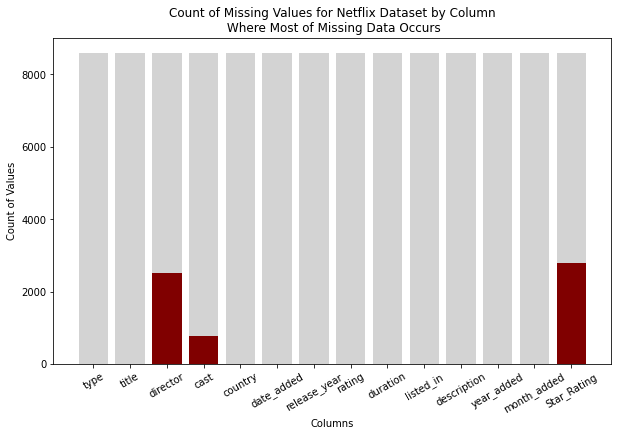

In [66]:
null_values = df_1.isnull().sum() 
not_null = df_1.notnull().sum() 
plt.figure(figsize=(10,6)) 
ax = plt.subplot() 
plt.bar(range(len(df_1.columns)),null_values,color='maroon') 
plt.bar(range(len(df_1.columns)),not_null,color='lightgray',bottom=null_values) 
ax.set_xticks(range(len(df_1.columns))) 
ax.set_xticklabels(df_1.columns,rotation=30) 
plt.xlabel('Columns') 
plt.ylabel('Count of Values') 
plt.title('Count of Missing Values for Netflix Dataset by Column\n Where Most of Missing Data Occurs') 
plt.show()

___

## 시각화

### Imdb 별점

* 국가별 별점 평균

* 장르별 별점 평균


In [75]:
#@title
temp = df_1[:5800]
temp

temp.Star_Rating = temp.Star_Rating.astype(float)

temp2 = temp.groupby(['country'], as_index=False).mean()
temp2

,country,release_year,rating,year_added,month_added,Star_Rating
0,", France, Algeria",2014.00000,16.000000,2021.000000,7.000000,6.600000
1,", South Korea",2021.00000,18.000000,2021.000000,8.000000,8.300000
2,Argentina,2017.73913,15.130435,2019.326087,6.521739,6.564444
3,"Argentina, Brazil, France, Poland, Germany, De...",2017.00000,16.000000,2018.000000,4.000000,6.300000
4,"Argentina, Chile",2006.00000,18.000000,2021.000000,2.000000,8.000000
...,...,...,...,...,...,...
516,"Uruguay, Guatemala",2019.00000,0.000000,2019.000000,11.000000,6.600000
517,"Uruguay, Spain, Mexico",2018.00000,18.000000,2019.000000,6.000000,6.700000
518,Vietnam,2020.00000,11.333333,2020.666667,7.333333,6.833333
519,West Germany,1994.50000,17.000000,2017.000000,6.000000,7.700000


In [76]:
#@title
temp2 = temp2.sort_values(by='Star_Rating', ascending=False)
temp2



,country,release_year,rating,year_added,month_added,Star_Rating
456,"United States, Colombia, Mexico",2017.0,18.0,2017.0,9.0,8.8
204,"Ireland, United States, United Kingdom",2016.0,0.0,2021.0,7.0,8.7
392,"United Kingdom, France, Poland, Germany, Unite...",2002.0,18.0,2021.0,4.0,8.6
295,"Romania, United Kingdom",2018.0,7.0,2020.0,2.0,8.5
432,"United Kingdom, United States, Japan",2005.0,18.0,2020.0,4.0,8.4
...,...,...,...,...,...,...
192,"Indonesia, Singapore",2012.0,16.0,2019.0,1.0,NaN
193,"Indonesia, South Korea, Singapore",2018.0,16.0,2020.0,1.0,NaN
304,Senegal,2019.0,18.0,2020.0,12.0,NaN
370,"United Arab Emirates, United States",2018.0,7.0,2018.0,3.0,NaN


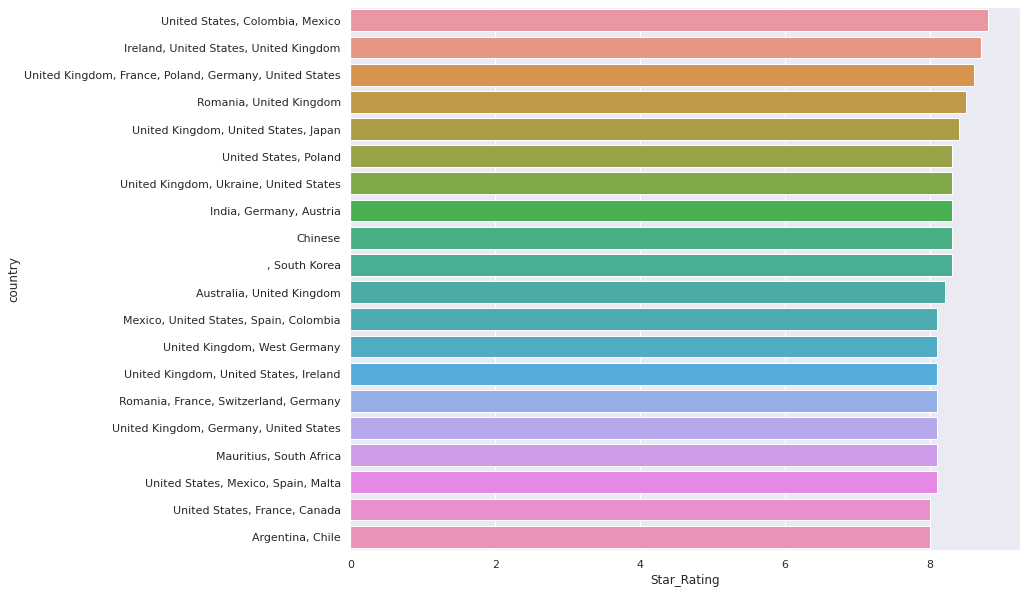

In [120]:
plt.figure(figsize=(12,10))
sns.barplot(y = temp2['country'][:20], x = temp2['Star_Rating'])

In [78]:
#@title
temp3 = temp.groupby(['listed_in'], as_index=False).mean()
temp3 = temp3.sort_values(by='Star_Rating', ascending=False)
temp3

,listed_in,release_year,rating,year_added,month_added,Star_Rating
126,"Classic & Cult TV, Kids' TV, TV Action & Adven...",2007.000000,7.000000,2020.000000,5.0,9.300000
49,"Action & Adventure, Sci-Fi & Fantasy, Thrillers",2010.000000,13.000000,2021.000000,8.0,8.800000
77,"British TV Shows, Classic & Cult TV, Internati...",2001.666667,16.666667,2018.333333,10.0,8.766667
394,"TV Action & Adventure, TV Comedies, TV Dramas",2021.000000,16.000000,2021.000000,1.0,8.600000
380,"Romantic TV Shows, TV Action & Adventure, TV D...",2018.000000,18.000000,2021.000000,1.0,8.500000
...,...,...,...,...,...,...
268,"Dramas, Romantic Movies, Sports Movies",2017.000000,13.000000,2017.000000,10.0,3.200000
25,"Action & Adventure, Cult Movies, Sci-Fi & Fantasy",2000.000000,13.000000,2021.000000,6.0,2.500000
96,"British TV Shows, Reality TV, Romantic TV Shows",2019.000000,18.000000,2020.000000,8.0,NaN
229,"Docuseries, Kids' TV, Science & Nature TV",2018.000000,0.000000,2018.000000,9.0,NaN


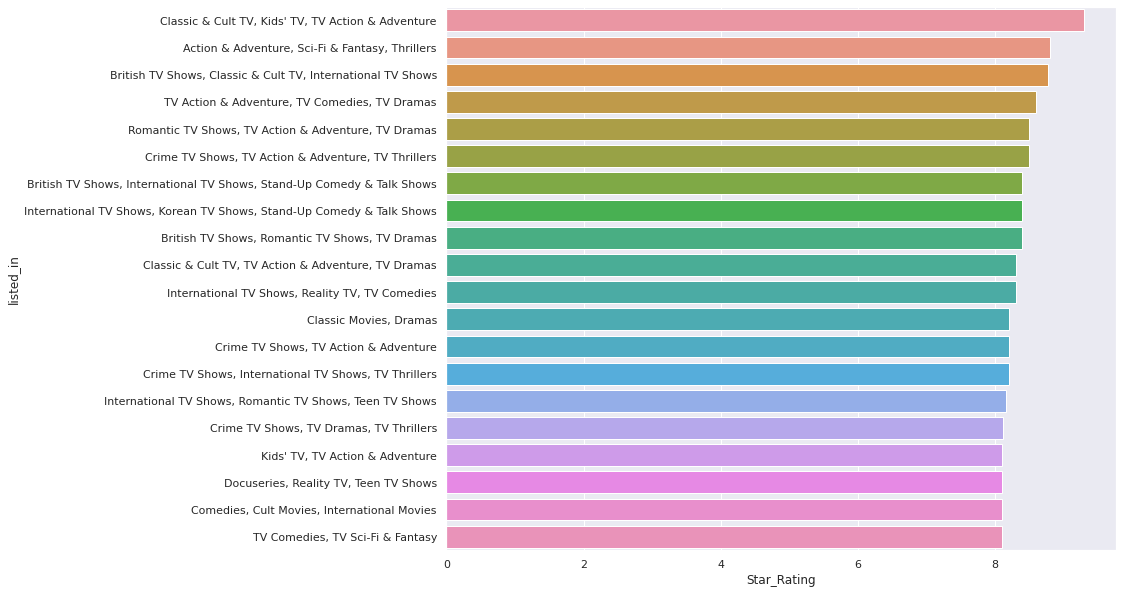

In [121]:
plt.figure(figsize=(12,10))
sns.barplot(y = temp3['listed_in'][:20], x = temp3['Star_Rating'])

In [130]:
df_1[df_1['listed_in']=="Classic & Cult TV, Kids' TV, TV Action & Adventure"]

,type,title,director,cast,country,date_added,split,release_year,rating,duration,listed_in,description,year_added,month_added,Star_Rating
2451,TV Show,Avatar: The Last Airbender,NaN,"Zach Tyler, Mae Whitman, Jack De Sena, Dee Bra...",United States,2020-05-15,[United States],2007,7.0,3 Seasons,"Classic & Cult TV, Kids' TV, TV Action & Adven...",Siblings Katara and Sokka wake young Aang from...,2020,5,9.3


## release_year

* 최신작일수록 넷플릭스에 더 많이 등록되어 있음을 알 수 있다. 
* 특히 TV Show에 비해 Movie의 경우 최근으로 올 수록 급격하게 늘어났다.

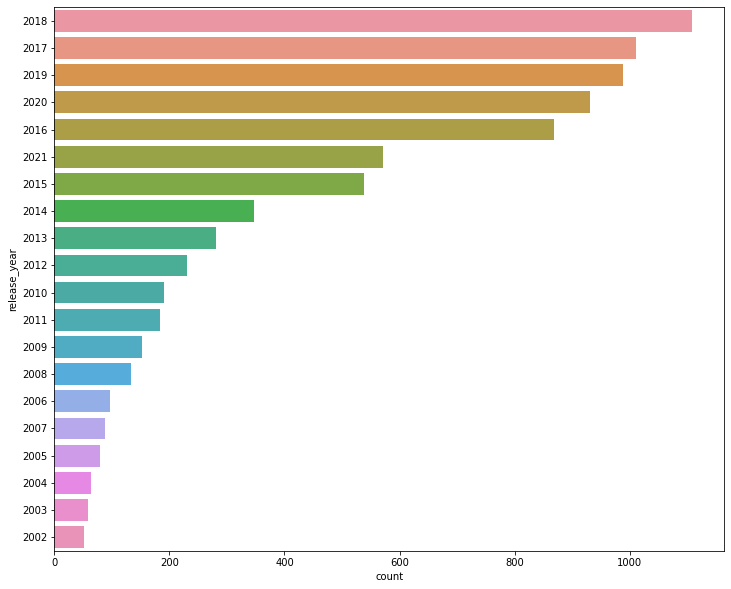

In [80]:
#@title
plt.figure(figsize=(12,10)) 
sns.countplot(y="release_year", data=df_1, order=df_1['release_year'].value_counts().index[0:20])

In [81]:
#@title
import plotly.graph_objects as go

d1 = df_1[df_1["type"] == "TV Show"]
d2 = df_1[df_1["type"] == "Movie"]

col = "year_added"

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Scatter(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="red"))
trace2 = go.Scatter(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="black"))
data = [trace1, trace2]
layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

In [83]:
#@title
import plotly.express as px

netflix_shows=df_1[df_1['type']=='TV Show'] 
netflix_movies=df_1[df_1['type']=='Movie']

fig = px.histogram(df_1, x = 'release_year', color='type', marginal="box", template="plotly_dark") 
fig.show()

## <u>type</u>

* Movie가 압도적으로 많다
* Movie가 TV Show에 비해서 관람등급이 높은 편
* 국가별로 Movie와 TV Show 비율의 차이가 많이 난다. 한국과 일본을 제외한 대부분의 나라에서는 Movies 비중이 높은 데 반해 한국은 TV Show 비중이 압도적으로 높다.

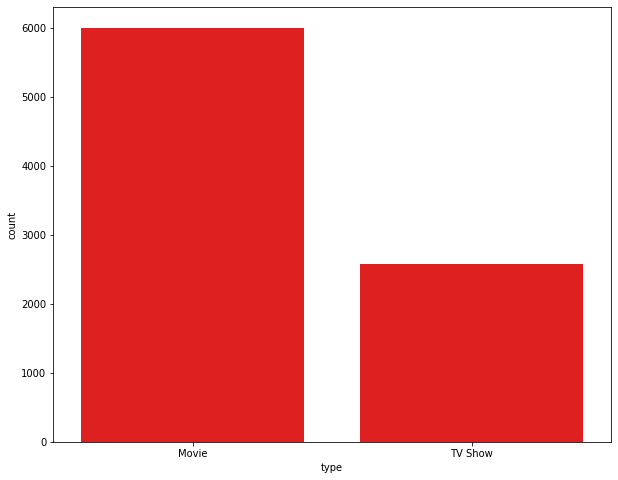

In [84]:
#@title
plt.figure(figsize=(10, 8)) 
sns.countplot(x='type',data = df_1, color='red')

Text(0.82, 0.9, 'TV Show')

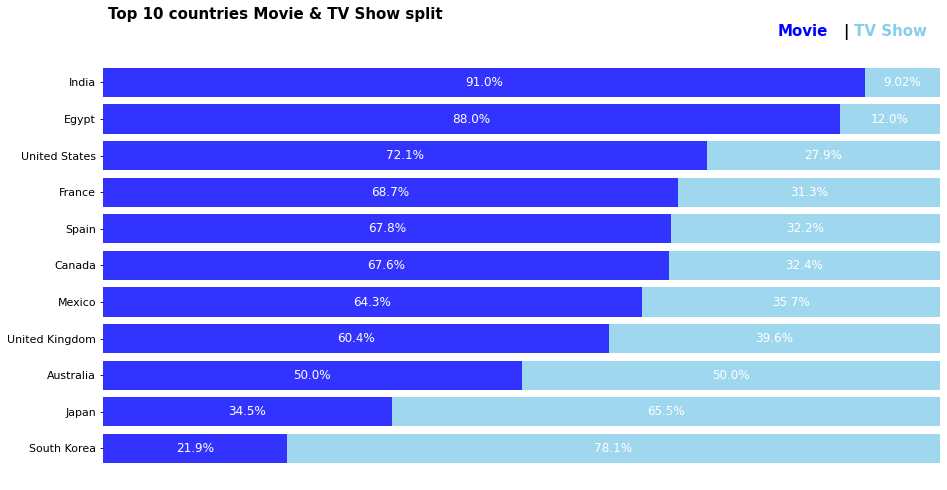

In [85]:
#@title
df1 = df_1.copy()

df1['first_country'] = df1['country'].apply(lambda x: x.split(",")[0])
df1['first_country'].head()


country_order = df1['first_country'].value_counts()[:11].index
data_q2q3 = df1[['type', 'first_country']].groupby('first_country')['type'].value_counts().unstack().loc[country_order]
data_q2q3['sum'] = data_q2q3.sum(axis=1)
data_q2q3_ratio = (data_q2q3.T / data_q2q3['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]




###
fig, ax = plt.subplots(1,1,figsize=(15, 8),)

ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Movie'], 
        color='blue', alpha=0.8, label='Movie')
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['TV Show'], left=data_q2q3_ratio['Movie'], 
        color='skyblue', alpha=0.8, label='TV Show')


ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticklabels(data_q2q3_ratio.index, fontsize=11)

# male percentage
for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['Movie'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', color='white')

for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['TV Show'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Movie'][i]+data_q2q3_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', color='white')
    

fig.text(0.13, 0.93, 'Top 10 countries Movie & TV Show split', fontsize=15, fontweight='bold')   

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
#ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.06))

fig.text(0.75,0.9,"Movie", fontweight="bold", fontsize=15, color='blue')
fig.text(0.81,0.9,"|", fontweight="bold", fontsize=15, color='black')
fig.text(0.82,0.9,"TV Show", fontweight="bold", fontsize=15, color='skyblue')

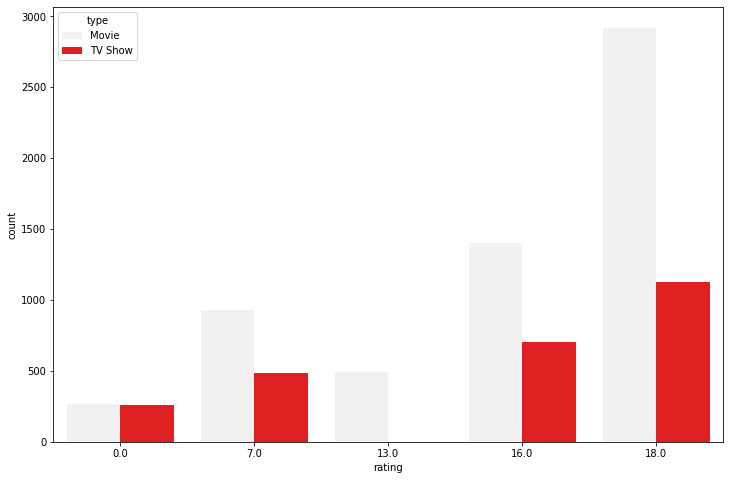

In [86]:
#@title
plt.figure(figsize = (12,8))
sns.countplot(x='rating',data = df_1,hue='type', color='red')

## listed_in

* listed_in의 경우 장르가 개별적으로 기입된 것이 아니라 해당되는 모든 장르가 입력되어 있기 때문에 카운팅에 한계가 있다. 

* 예를 들어 TV Show의 경우 Kid's TV가 가장 수가 많은 것처럼 보이지만, 실은 200개 남짓이다. 이는 Kid's TV가 유일하게 기입된 행이 많기 때문으로 보인다. 

* 반대로, TV Dramas는 여러 카테고리에 들어가 있어서 카운팅이 다 따로되어 있음을 볼 수 있다.

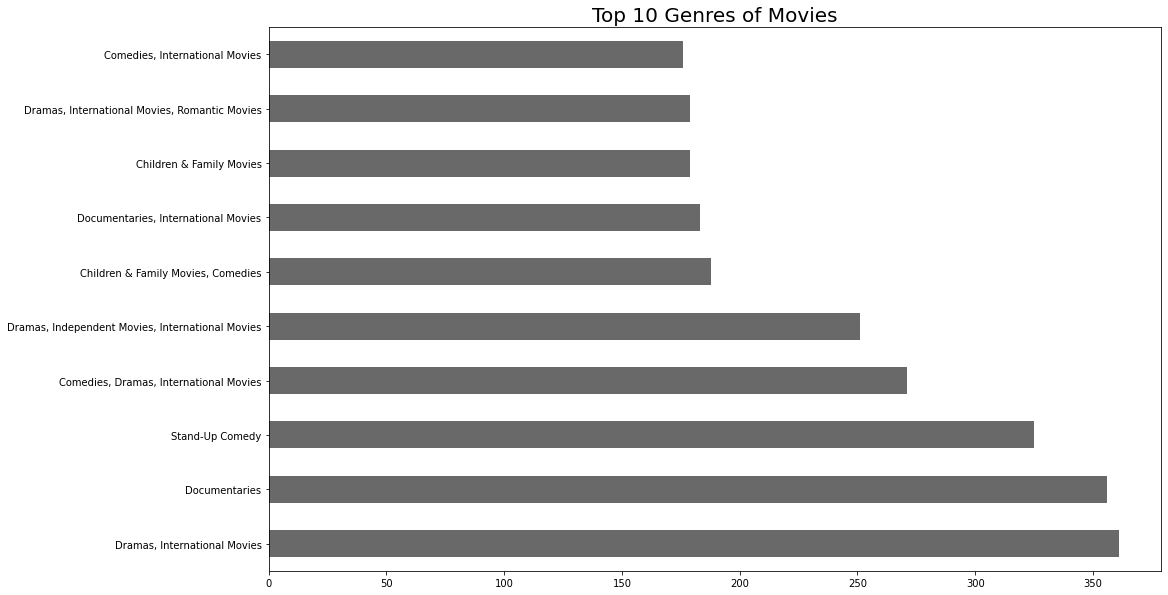

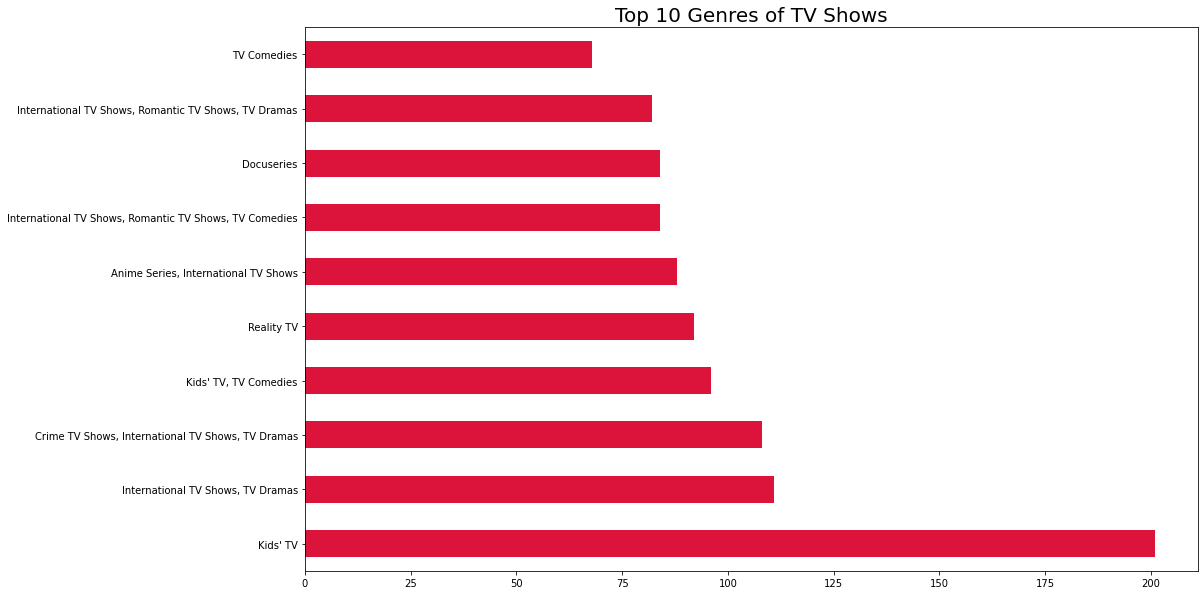

In [87]:
#@title
plt.figure(figsize=(16,10)) 
plt.title("Top 10 Genres of Movies", fontsize=20) 
df_1[df_1["type"]=="Movie"]["listed_in"].value_counts()[:10].plot(kind="barh", color='dimgrey');

plt.figure(figsize=(16,10)) 
plt.title("Top 10 Genres of TV Shows", fontsize=20) 
df_1[df_1["type"]=="TV Show"]["listed_in"].value_counts()[:10].plot(kind="barh", color='crimson');

## rating

* 넷플릭스에는 청소년 관람 불가 컨텐츠가 굉장히 많다. 

* 전체적인 비율로 봤을 때, 어린이/청소년 보다는 어른을 타겟으로 한 컨텐츠가 주를 이룬다.

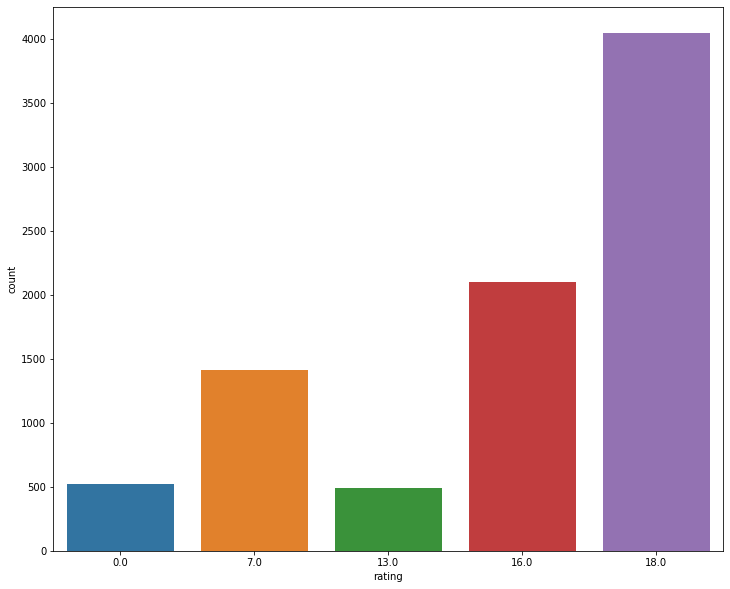

In [88]:
#@title
plt.figure(figsize=(12,10))
sns.countplot(df_1.rating)

In [89]:
#@title
import plotly.express as px

z = df_1.groupby(['rating']).size().reset_index(name='counts') 
pieChart = px.pie(z, values='counts', names='rating', title='Distribution of Content Ratings on Netflix') 
pieChart.show()

## duration

In [93]:
#@title
df6 = df_1.copy()

df6['duration'] = df.duration.str.split(' ').str.get(0) 
df6.head(1)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,Star_Rating
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,13.0,90,Documentaries,"As her father nears the end of his life, filmm...",2021,9,7.4


In [94]:
#@title
df6 = df_1[df_1['duration'].str.split(' ').str.get(1)=='min'] 
df6.head(5)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,Star_Rating
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,13.0,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,7.4
6,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,2021-09-24,2021,7.0,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,9,6.9
7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,18.0,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,9,7.0
9,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,13.0,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,9,6.3
12,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,18.0,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021,9,5.4


In [95]:
#@title
df6['duration'] = df6.duration.str.split(' ').str.get(0) 
df6.head(1)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,Star_Rating
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,13.0,90,Documentaries,"As her father nears the end of his life, filmm...",2021,9,7.4


In [96]:
#@title
df7 = df6.duration.value_counts().sort_values(ascending=False).head(10) 
df7

90     152
97     146
94     146
93     146
91     141
95     137
92     129
96     127
102    122
99     118
Name: duration, dtype: int64

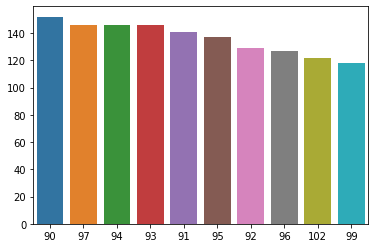

In [97]:
sns.barplot(x=df7.index, y=df7.to_list())

## 대한민국이 원산지인 작품을 찾자! 우리는 대한민국이 원산지인 TV SHOW와 movie를 보고 싶다. 대한민국이 원산지인 작품들 수가 Top 5 안에 들어가기 때문에 어떤 작품이 흥행을 하고 있는지 궁금하기 때문이다.

In [98]:
df_1.country == 'South Korea'

0       False
1       False
2       False
3       False
4       False
        ...  
8586    False
8587     True
8588    False
8589    False
8590    False
Name: country, Length: 8581, dtype: bool

country 컬럼에서 South Korea를 바로 찾을 수 없다. 보이는 행들 전부 False가 뜬다.

In [99]:
(df_1.country == 'South Korea').sum()

225

In [100]:
df_1[df_1['country']=='South Korea']

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,Star_Rating
33,TV Show,Squid Game,NaN,"Lee Jung-jae, Park Hae-soo, Wi Ha-jun, Oh Youn...",South Korea,2021-09-17,2021,18.0,1 Season,"International TV Shows, TV Dramas, TV Thrillers",Hundreds of cash-strapped players accept a str...,2021,9,8.1
97,TV Show,Tobot Galaxy Detectives,NaN,"Austin Abell, Travis Turner, Cole Howard, Anna...",South Korea,2021-09-07,2019,7.0,2 Seasons,Kids' TV,An intergalactic device transforms toy cars in...,2021,9,7.0
101,TV Show,Tayo the Little Bus,NaN,"Robyn Slade, Kami Desilets",South Korea,2021-09-06,2016,0.0,2 Seasons,"Kids' TV, Korean TV Shows",As they learn their routes around the busy cit...,2021,9,5.4
118,TV Show,Hotel Del Luna,NaN,"Lee Ji-eun, Yeo Jin-goo, Shin Jung-geun, Seo Y...",South Korea,2021-09-02,2019,16.0,1 Season,"International TV Shows, Romantic TV Shows, TV ...",When he's invited to manage a hotel for dead s...,2021,9,8.3
121,TV Show,Pororo - The Little Penguin,NaN,NaN,South Korea,2021-09-02,2013,7.0,3 Seasons,"Kids' TV, Korean TV Shows","On a tiny island, Pororo the penguin has fun a...",2021,9,6.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8254,Movie,The Prison,Na Hyeon,"Suk-kyu Han, Rae-won Kim, Kyeong-yeong Lee, Wo...",South Korea,2017-11-18,2017,18.0,125 min,"Action & Adventure, Dramas, International Movies",A cop-turned-convict discovers a crime syndica...,2017,11,NaN
8362,TV Show,This Is My Love,NaN,"Jin-mo Joo, Sa-rang Kim, Junior, Ja-in Lee, Su...",South Korea,2017-05-22,2015,16.0,1 Season,"International TV Shows, Korean TV Shows, Roman...",A renowned actor who is still pining over the ...,2017,5,NaN
8399,Movie,Train to Busan,Sang-ho Yeon,"Gong Yoo, Yu-mi Jung, Dong-seok Ma, Soo-an Kim...",South Korea,2017-03-18,2016,18.0,118 min,"Action & Adventure, Horror Movies, Internation...","As a zombie outbreak sweeps the country, a dad...",2017,3,NaN
8470,TV Show,Vroomiz,NaN,"Joon-seok Song, Jeong-hwa Yang, Sang-hyun Um, ...",South Korea,2017-08-01,2016,0.0,3 Seasons,"Kids' TV, Korean TV Shows","For these half-car, half-animal friends, each ...",2017,8,NaN


South Korea만 적혀있는 행은 총 255개다. 표를 확인하면 255개인 것을 확인할 수 있다. 하지만 독립제작만 카운트되고 공동제작은 카운트되지 않았다.

In [101]:
one = df_1.country[2978] 
one

'United States, South Korea'

CSV 파일을 확인해보면 2978행에 South Korea가 원산지로 명시되어 있다.

In [102]:
one.split(', ')

['United States', 'South Korea']

원산지들이 ,로 구별되어 있기 때문에 split을 이용해 각 단어를 잘라서 리스트로 만든다.

In [103]:
df_1.country.str.split(', ')

0       [United States]
1        [South Africa]
2              [France]
3       [United States]
4               [India]
             ...       
8586    [United States]
8587      [South Korea]
8588    [United States]
8589    [United States]
8590            [India]
Name: country, Length: 8581, dtype: object

str.split을 이용해서 모든 행을 다 리스트화 한다. 각 나라별로 구별이 되어야 한다.

In [104]:
df_1.insert(6, 'split', df_1.country.str.split(', ')) 
df_1

,type,title,director,cast,country,date_added,split,release_year,rating,duration,listed_in,description,year_added,month_added,Star_Rating
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,[United States],2020,13.0,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,7.4
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,[South Africa],2021,18.0,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,NaN
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",France,2021-09-24,[France],2021,18.0,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,7.0
3,TV Show,Jailbirds New Orleans,NaN,NaN,United States,2021-09-24,[United States],2021,18.0,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9,6.7
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,[India],2021,18.0,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9,9.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8586,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,[United States],2007,18.0,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019,11,NaN
8587,TV Show,Zombie Dumb,NaN,NaN,South Korea,2019-07-01,[South Korea],2018,7.0,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019,7,NaN
8588,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,[United States],2009,18.0,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019,11,NaN
8589,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,[United States],2006,7.0,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,1,NaN


만든 시리즈를 원하는 열에 컬럼으로 추가한다.

In [105]:
pd.isnull(df_1.country).sum()

0

In [106]:
def s_check(countrys): 

  n_list = [] 

  for country in countrys: 
    if country == 'South Korea': 
      n_list.append(True) 
    else: 
        n_list.append(False) 
        
  if np.sum(n_list) >= 1: 
      return True 
  else: 
      return False

South Korea가 들어가면 n_list에 True를 넣고, True가 있는 행(리스트)이라면 합이 1 이상일 것이므로, 최종적으로 True를 반환하게 한다.

In [107]:
df_1.split[70:90].apply(s_check)

70    False
71    False
72    False
73    False
74    False
75    False
76    False
77    False
78    False
79    False
80    False
81    False
82    False
83    False
84    False
85    False
86    False
87    False
88    False
89    False
Name: split, dtype: bool

In [108]:
(df_1.country == 'South Korea').sum()

225

South Korea가 들어간 행의 갯수가 255개다.

In [109]:
df_1.split.apply(s_check).sum()

257

South Korea가 들어간 행의 갯수가 231개로 늘었다. 독립제작, 공동제작 모두 찾아냈다.

In [110]:
cond = df_1.split.apply(s_check) 
SK_df = df_1[cond] 
print(SK_df.shape) 
SK_df

(257, 15)


,type,title,director,cast,country,date_added,split,release_year,rating,duration,listed_in,description,year_added,month_added,Star_Rating
33,TV Show,Squid Game,NaN,"Lee Jung-jae, Park Hae-soo, Wi Ha-jun, Oh Youn...",South Korea,2021-09-17,[South Korea],2021,18.0,1 Season,"International TV Shows, TV Dramas, TV Thrillers",Hundreds of cash-strapped players accept a str...,2021,9,8.1
97,TV Show,Tobot Galaxy Detectives,NaN,"Austin Abell, Travis Turner, Cole Howard, Anna...",South Korea,2021-09-07,[South Korea],2019,7.0,2 Seasons,Kids' TV,An intergalactic device transforms toy cars in...,2021,9,7.0
101,TV Show,Tayo the Little Bus,NaN,"Robyn Slade, Kami Desilets",South Korea,2021-09-06,[South Korea],2016,0.0,2 Seasons,"Kids' TV, Korean TV Shows",As they learn their routes around the busy cit...,2021,9,5.4
118,TV Show,Hotel Del Luna,NaN,"Lee Ji-eun, Yeo Jin-goo, Shin Jung-geun, Seo Y...",South Korea,2021-09-02,[South Korea],2019,16.0,1 Season,"International TV Shows, Romantic TV Shows, TV ...",When he's invited to manage a hotel for dead s...,2021,9,8.3
121,TV Show,Pororo - The Little Penguin,NaN,NaN,South Korea,2021-09-02,[South Korea],2013,7.0,3 Seasons,"Kids' TV, Korean TV Shows","On a tiny island, Pororo the penguin has fun a...",2021,9,6.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8362,TV Show,This Is My Love,NaN,"Jin-mo Joo, Sa-rang Kim, Junior, Ja-in Lee, Su...",South Korea,2017-05-22,[South Korea],2015,16.0,1 Season,"International TV Shows, Korean TV Shows, Roman...",A renowned actor who is still pining over the ...,2017,5,NaN
8399,Movie,Train to Busan,Sang-ho Yeon,"Gong Yoo, Yu-mi Jung, Dong-seok Ma, Soo-an Kim...",South Korea,2017-03-18,[South Korea],2016,18.0,118 min,"Action & Adventure, Horror Movies, Internation...","As a zombie outbreak sweeps the country, a dad...",2017,3,NaN
8470,TV Show,Vroomiz,NaN,"Joon-seok Song, Jeong-hwa Yang, Sang-hyun Um, ...",South Korea,2017-08-01,[South Korea],2016,0.0,3 Seasons,"Kids' TV, Korean TV Shows","For these half-car, half-animal friends, each ...",2017,8,NaN
8581,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia",2018-09-13,"[United States, France, South Korea, Indonesia]",2016,7.0,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...,2018,9,NaN


South Korea가 들어간 257행 모두 찾아냈다.

In [111]:
netflix_shows=SK_df[SK_df['type']=='TV Show'] 
netflix_movies=SK_df[SK_df['type']=='Movie']

fig = px.histogram(SK_df, x = 'release_year', color='type', marginal="box", template="plotly_dark") 
fig.show()

2004년 영화 '효자동 이발사'와 2008년 영화 '가필드 마법의 샘물'이 CSV파일에 있는 것을 보니 생각보다 오래 전에 넷플릭스 시장으로의 진출을 시도했던 것으로 보인다. 물론 '가필드 마법의 샘물'은 원산지가 대한민국이기는 하지만 'KD미디어'라는 배급사가 미국 배급사와 함께 있는 것을 보니 이 영화를 배급하고 유통하는 역할을 했을 것으로 보인다. 물론 배급사가 영화 제작에 투자자로서 참여하거나 아예 제작까지 하는 경우가 있다고 하는 경우가 있다고 하니 대한민국이 원산지라고 볼 여지가 있다.

In [125]:
SK_df.Star_Rating.isna().sum()

46

In [128]:
temp4 = SK_df[:-50]

temp4.Star_Rating = temp4.Star_Rating.astype(float)

temp5 = temp.groupby(['country'], as_index=False).mean()

In [129]:
temp4 = SK_df[:-50].groupby(['listed_in'], as_index=False).mean()
temp4

,listed_in,release_year,rating,year_added,month_added
0,"Action & Adventure, Anime Features",2021.000000,18.000000,2021.000000,8.000000
1,"Action & Adventure, Comedies, Dramas",2017.000000,18.000000,2017.000000,6.000000
2,"Action & Adventure, Comedies, International Mo...",2018.000000,18.000000,2018.000000,4.000000
3,"Action & Adventure, Cult Movies, International...",2013.000000,18.000000,2021.000000,7.000000
4,"Action & Adventure, Dramas, International Movies",2019.500000,18.000000,2019.500000,2.500000
5,"Action & Adventure, International Movies",2018.000000,18.000000,2019.000000,1.000000
6,"Action & Adventure, International Movies, Sci-...",2018.000000,18.000000,2019.000000,8.000000
7,Children & Family Movies,2019.000000,0.000000,2021.000000,1.000000
8,"Children & Family Movies, Comedies",2015.285714,6.000000,2019.857143,5.428571
9,"Children & Family Movies, Comedies, Sci-Fi & F...",2019.000000,7.000000,2019.000000,8.000000


In [112]:
SK_df['director'].value_counts()

Kim Joo-hyung     2
Bong Joon Ho      2
Kim Seong-hun     2
Sang-ho Yeon      2
Park Hoon-jung    2
                 ..
Lee Yoon-jung     1
Jang Jae-hyun     1
Lee Jeong-beom    1
Woo Min-ho        1
Dejan Zečević     1
Name: director, Length: 69, dtype: int64

In [113]:
SK_df['cast'].value_counts()

Lee Jung-jae, Park Hae-soo, Wi Ha-jun, Oh Young-soo, Jung Ho-yeon, Heo Sung-tae, Kim Joo-ryoung, Tripathi Anupam, You Seong-joo, Lee You-mi                          1
Ye-ri Han, Seung-Yeon Han, Eun-bin Park, Hwa-young Ryu, Hye-soo Park                                                                                                 1
Sierra Li, Dylan Xiong, Yu Yi Jie, Zhao Yao Ke, Tien Hsin                                                                                                            1
Lee Byung-hun, Kim Tae-ri, Yoo Yeon-seok, Kim Min-jung, Byun Yo-han                                                                                                  1
Son Ye-jin, Jung Hae-in, Jang So-yeon                                                                                                                                1
                                                                                                                                                                    .

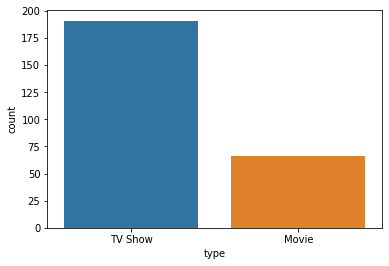

In [114]:
sns.countplot(SK_df['type'])

대한민국은 Movie보다 TV Show 제작에 힘을 쓰는 것으로 보인다.

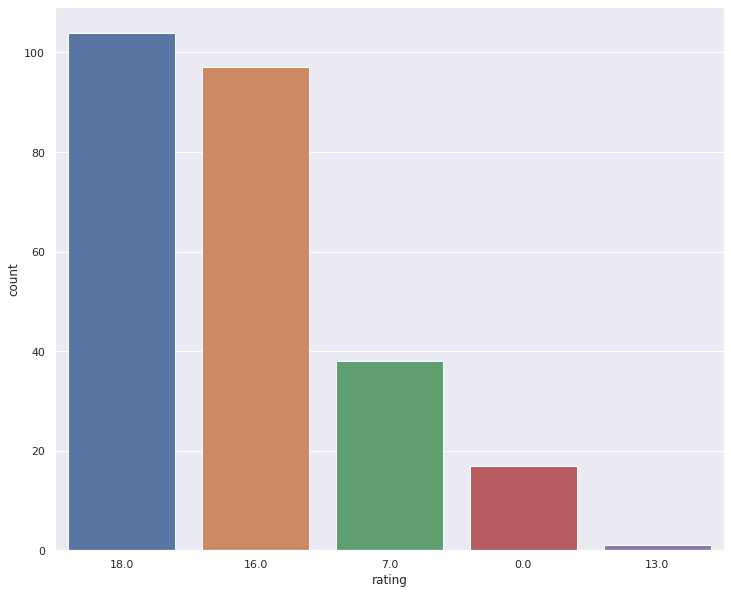

In [115]:
plt.figure(figsize=(12,10)) 
sns.set(style="darkgrid") 
ax = sns.countplot(x="rating", data=SK_df, order=SK_df['rating'].value_counts().index[0:15])

대한민국은 청소년 관람불가 위주로 작품을 만드는 것으로 보인다. 전체관람가보다는 수위가 높은 작품 제작을 선호하는 것으로 판단되고, 그 판단대로 흥행했다. 최근 흥행했던 오징어게임(18세 이상)과 호텔 델루나(16세 이상)를 생각해보면 될 것이다. 두 작품은 영화와 TV Show 중 대표적으로 각각 선정한 것이다.

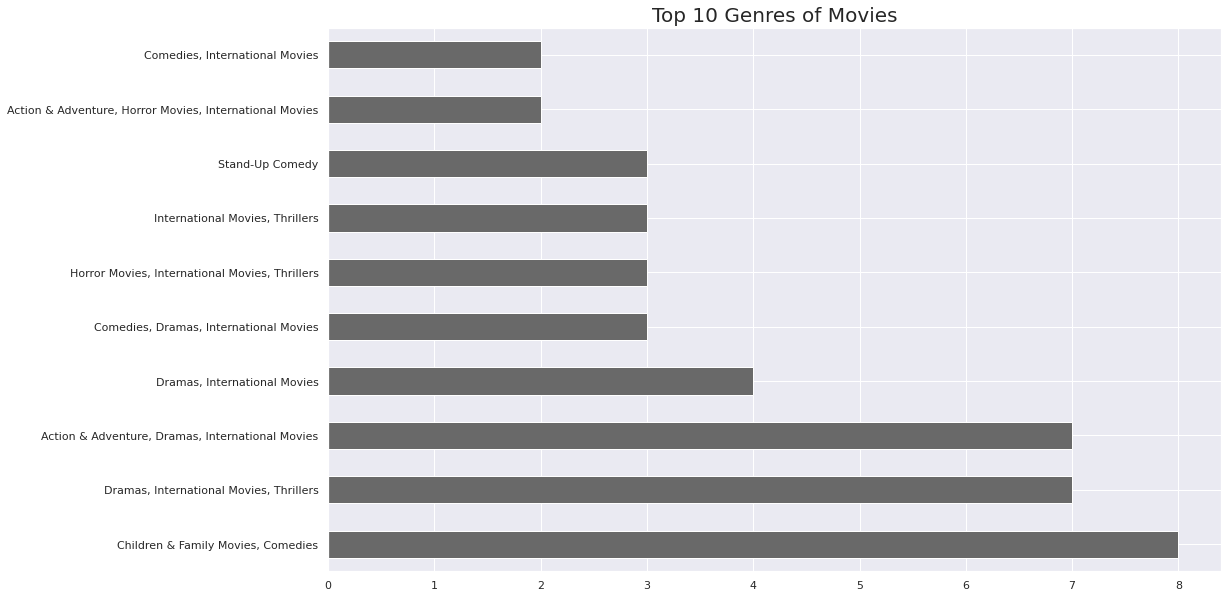

In [116]:
plt.figure(figsize=(16,10)) 
plt.title("Top 10 Genres of Movies", fontsize=20) 
SK_df[SK_df["type"]=="Movie"]["listed_in"].value_counts()[:10].plot(kind="barh", color='dimgrey');

대한민국 제작사들이 영화를 제작할 시 가족, 코미디 장르를 선호한다. 액션, 어드벤쳐, 드라마, 국외가 그 뒤를 잇는다.

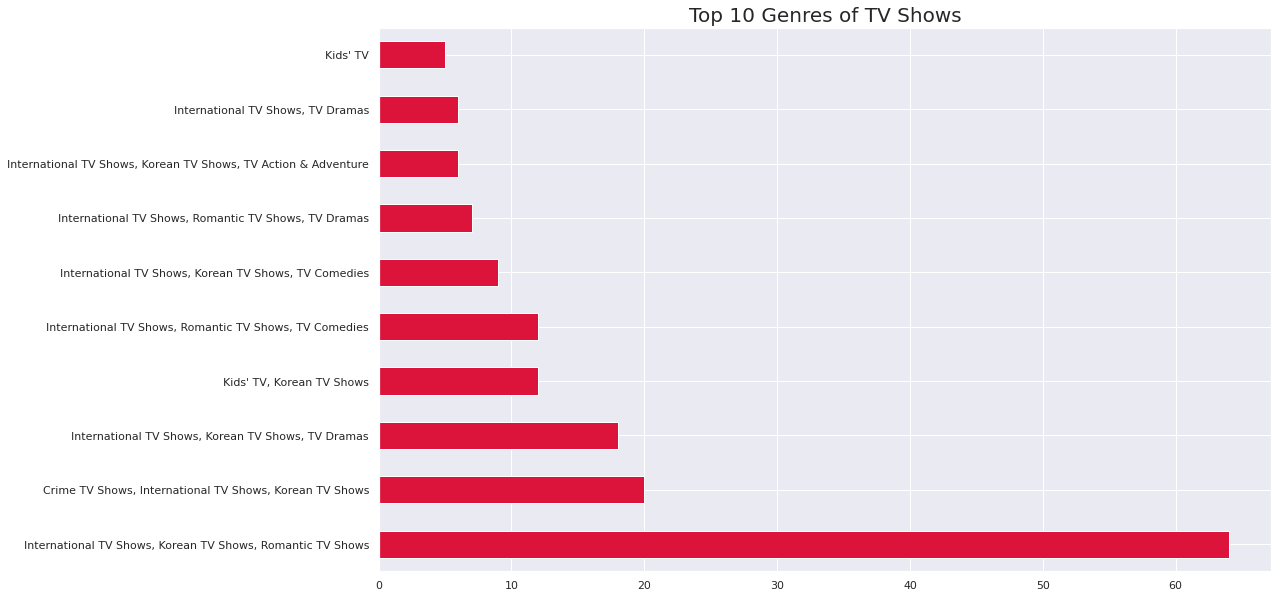

In [117]:
plt.figure(figsize=(16,10)) 
plt.title("Top 10 Genres of TV Shows", fontsize=20) 
SK_df[SK_df["type"]=="TV Show"]["listed_in"].value_counts()[:10].plot(kind="barh", color='crimson');

대한민국 제작사들이 TV Show를 제작할 시 국외, 국내, 로맨틱 장르를 선호한다. 범죄, 국외, 국내 장르가 뒤를 잇는다.

There are 158256 words in the combination of all cells in column title.


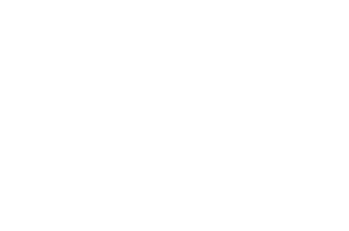

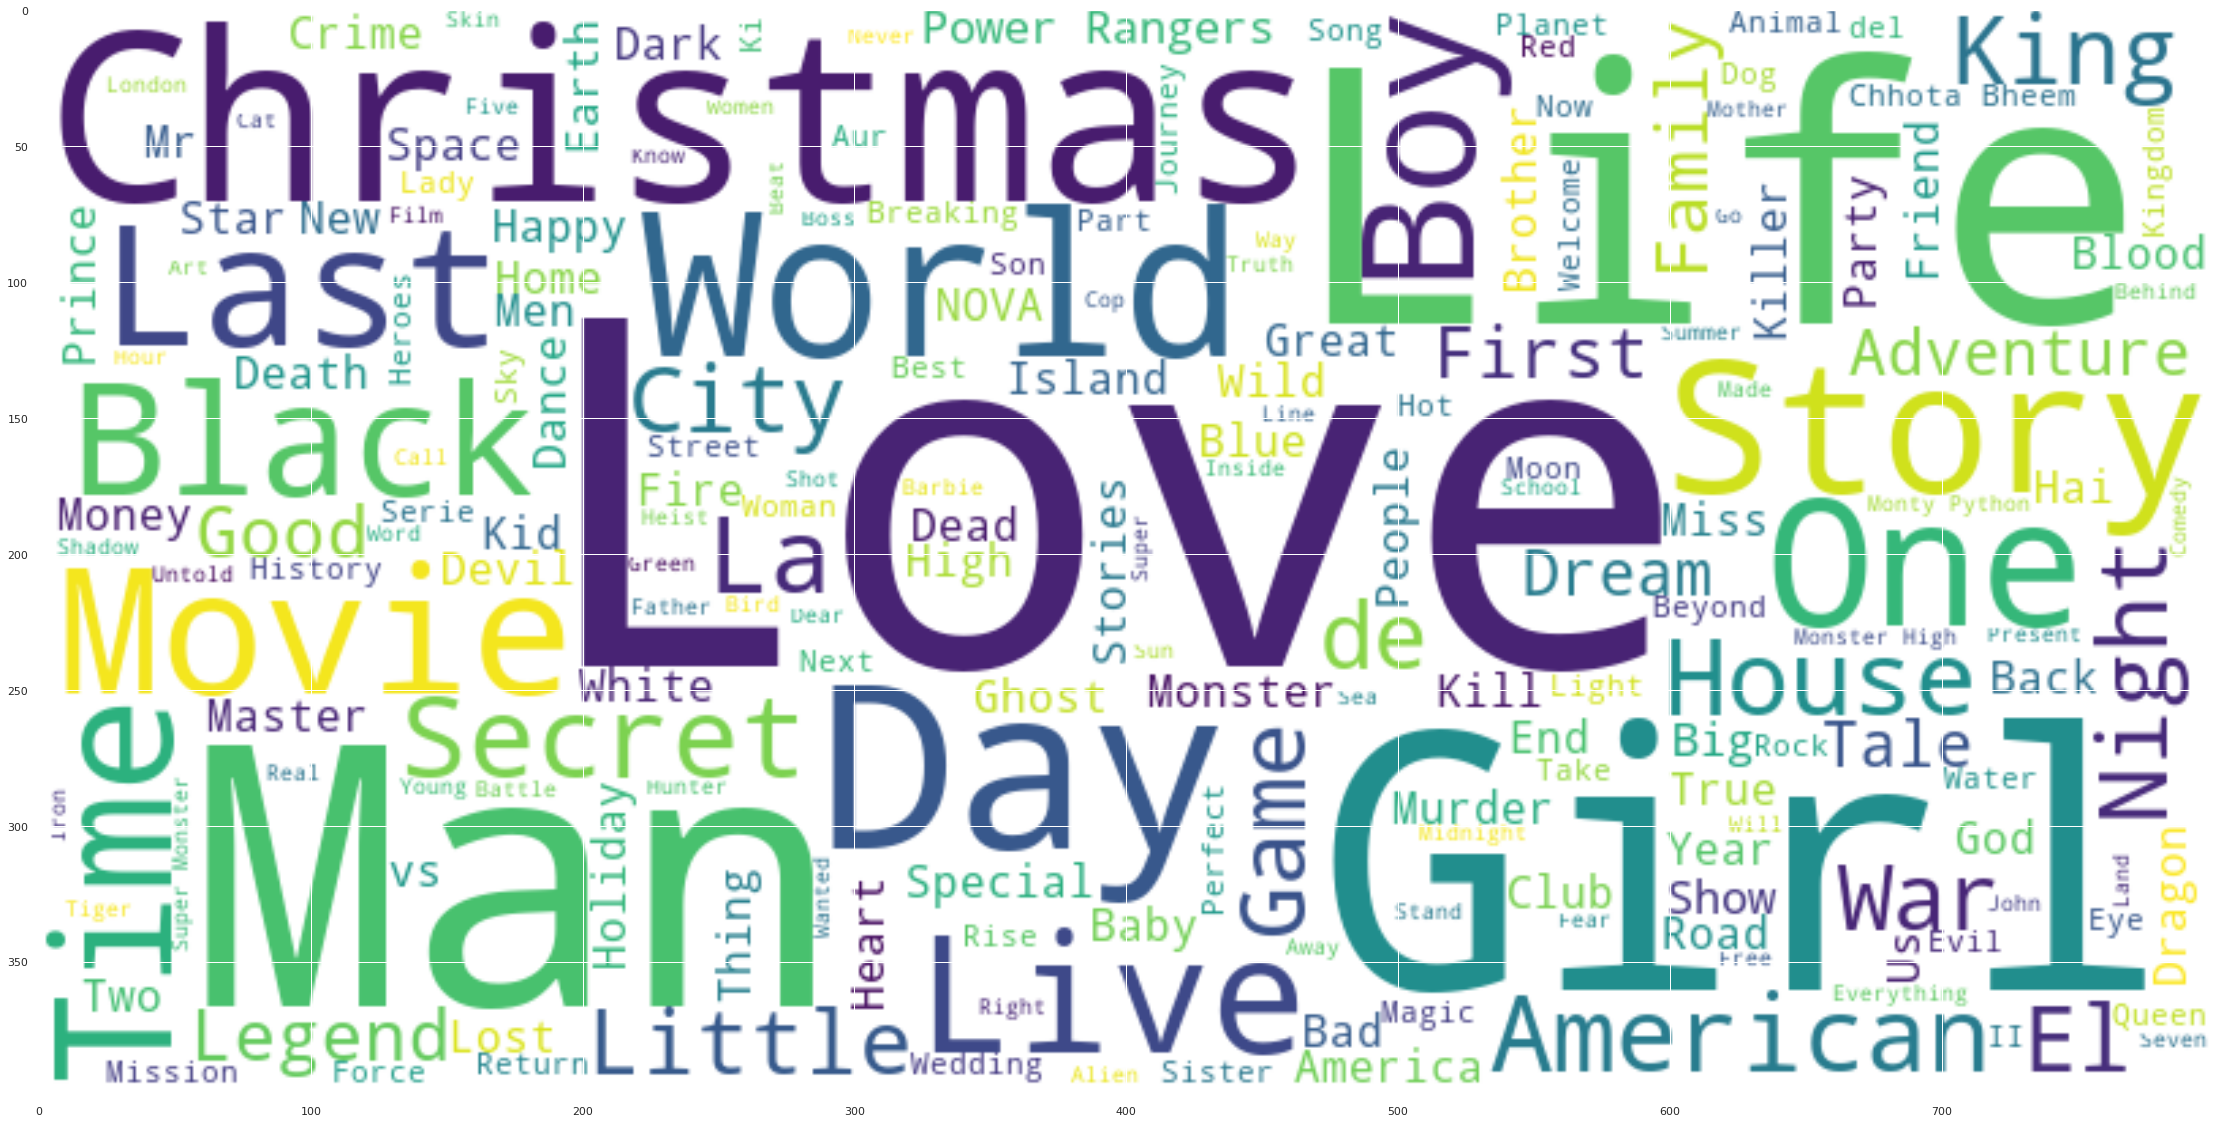

In [118]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = " ".join(review for review in df_1.title.astype(str)) 
print("There are {} words in the combination of all cells in column title.".format(len(text))) 
# Generate a word cloud image 
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(text) 

# Display the generated image: 

# the matplotlib way: 
plt.axis("off") 
plt.figure(figsize=(40,20)) 
plt.tight_layout(pad=0) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.show()